# Backpropagation for MLP

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## The Math-Stuff

We have a single hidden layer neural network regression model $f(\textbf{x})$ given as:  

$f(\textbf{x})=\textbf{w}_2^T \cdot \pi(\textbf{W}_1^T \textbf{x})$ where $\pi: \mathbb{R}^k \mapsto \mathbb{R}^k$ is the logistic sigmoid function applied elementwise as 
$\pi(x) = \frac{1}{1+e^{-x}}$  

for $\textbf{x} \in \mathbb{R}^d, \textbf{W}_1 \in \mathbb{R}^{d \times k}, \textbf{w}_2 \in \mathbb{R}^k$

Moreover, we use a squared error function $l = \frac{1}{2}(y-f(\textbf{x}))^2$

A deconstruction of the computation can be seen in the computational graph below:

![](compGraph.png)

So,  
$l = \frac{1}{2}(y-o)^2$,  
$o=\textbf{w}_2^T \textbf{h}$,  
$\textbf{h} = \pi(\textbf{z}) = \frac{1}{1+e^{-z}}$,  
$\textbf{z} = \textbf{W}_1^T \textbf{x}$  

Also, let $\textbf{m}$ denote the following partial derivative: $m:=\frac{\partial \textbf{h}}{\partial \textbf{z}} = \pi(\textbf{z})\cdot (1-\pi(\textbf{z}))$  


Note that the gradient matrix $\textbf{G}_1$ of the loss $l$ w.r.t. $\textbf{W}_1$ is given by:  

$\frac{\partial l}{\partial \textbf{W}_1} =  \frac{\partial l}{\partial o} \frac{\partial o}{\partial \textbf{h}} \frac{\partial \textbf{h}}{\partial \textbf{z}} \frac{\partial \textbf{z}}{\partial \textbf{W}_1}$

$=(y-o)\textbf{w}_2 \circ \textbf{m} \cdot \textbf{x}^T$ where $\circ$ denotes the elementwise Hadamard product.

And the gradient vector of $l$ w.r.t. $\textbf{w}_2$ is given by  

$\frac{\partial l}{\partial \textbf{w}_2} = \frac{\partial l}{\partial \textbf{o}} \frac{\partial o}{\partial \textbf{w}_2}$

$=(y-o)\cdot \textbf{h}$




## Function Definitions

In [29]:
def pi(x: np.ndarray) -> np.ndarray:
    """Calculates element-wise sigmoid function"""
    return 1 / (1 + np.exp(-x))


def l(y: float, o: float) -> float:
    """Calculates squared loss on a single sample"""
    return 1 / 2 * (y - o) ** 2


def partial_l_o(y: float, o: float) -> float:
    """Calculates partial l w.r.t. o"""
    return y - o


def _partial_pi_z_scalar(z: np.ndarray) -> np.ndarray:
    """For a single scalar, calculates derivative of pi/sigmoid"""
    return pi(z) * (1 - pi(z))


def partial_pi_z(z: np.ndarray) -> np.ndarray:
    """For an array of zs, calculates the matrix of derivatives partial h_j w.r.t. z_i"""
    # return np.diag(_partial_pi_z_scalar(z.flatten()))
    return _partial_pi_z_scalar(z)


def partial_l_w1(y, o, x, w2):
    """Using the chain rule, calculates partial l w.r.t. W1"""
    #breakpoint()
    return np.matmul(
        np.matmul(
            np.matmul(
                partial_l_o(y, o), w2.T
            ), partial_pi_z(np.matmul(w1.T, x))
        ).T, x.T
    )


def partial_l_w2(y, o, x, w1):
    """Calculates gradient of l w.r.t. w2"""
    return (y-o) * pi(w1.T @ x)


def predict(x: np.ndarray, w1: np.ndarray, w2: np.ndarray) -> np.ndarray:
    """Given learned weights and input x, predicts y"""
    return np.matmul(
        w2.T,
        pi(np.matmul(w1.T, x))
    )


## Initilizations

In [30]:
w1 = np.array([[1, 2, 3], [4, 5, 6], [3, 2, 1], [9, 8, 1], [4, 2, 1]]) / 10
w2 = np.array([1, 2, 3]).reshape(-1, 1) / 10
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) / 10
y = np.array([0])

o = predict(x, w1, w2)

In [31]:
loss = []
for i in range(10):
    o = predict(x, w1, w2)
    loss.append(l(y, o).item())
    print(f"Prediction = {o.item()} ---> loss = {loss[-1]}")
    w1 += partial_l_w1(y, o, x, w2).T
    w2 += partial_l_w2(y, o, x, w1)

Prediction = 0.3669587183586477 ---> loss = 0.06732935048971066
Prediction = -0.06716647560213845 ---> loss = 0.00225566772240633
Prediction = 0.011528442229470793 ---> loss = 6.645249011912276e-05
Prediction = -0.0019770820035962563 ---> loss = 1.9544266244720937e-06
Prediction = 0.0003389701214951662 ---> loss = 5.745037163322387e-08
Prediction = -5.8118310749186814e-05 ---> loss = 1.6888690221695218e-09
Prediction = 9.96464539990507e-06 ---> loss = 4.964707897292464e-11
Prediction = -1.7084850088692257e-06 ---> loss = 1.4594605127654392e-12
Prediction = 2.929276837846523e-07 ---> loss = 4.290331396372062e-14
Prediction = -5.022381239258404e-08 ---> loss = 1.2612156656227392e-15


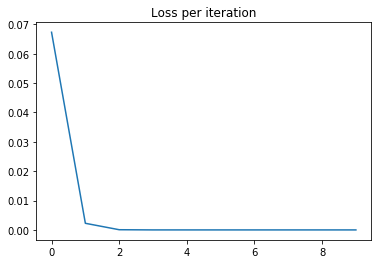

In [32]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title('Loss per iteration')
plt.show()